<a href="https://colab.research.google.com/github/rss19/SDS_AAU_GroupAssignment/blob/main/Red_Wine_EDA_and_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
R.Version()

In [ ]:
install.packages('GGally')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)
library(magrittr)
library(GGally)
library(dplyr)

In [ ]:
data <- read_csv('winequality-red.csv')
data %>% head()

Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double()
)



fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


In [ ]:
data %>% glimpse()

Rows: 1,599
Columns: 12
$ `fixed acidity`        <dbl> 7.4, 7.8, 7.8, 11.2, 7.4, 7.4, 7.9, 7.3, 7.8, …
$ `volatile acidity`     <dbl> 0.700, 0.880, 0.760, 0.280, 0.700, 0.660, 0.60…
$ `citric acid`          <dbl> 0.00, 0.00, 0.04, 0.56, 0.00, 0.00, 0.06, 0.00…
$ `residual sugar`       <dbl> 1.9, 2.6, 2.3, 1.9, 1.9, 1.8, 1.6, 1.2, 2.0, 6…
$ chlorides              <dbl> 0.076, 0.098, 0.092, 0.075, 0.076, 0.075, 0.06…
$ `free sulfur dioxide`  <dbl> 11, 25, 15, 17, 11, 13, 15, 15, 9, 17, 15, 17,…
$ `total sulfur dioxide` <dbl> 34, 67, 54, 60, 34, 40, 59, 21, 18, 102, 65, 1…
$ density                <dbl> 0.9978, 0.9968, 0.9970, 0.9980, 0.9978, 0.9978…
$ pH                     <dbl> 3.51, 3.20, 3.26, 3.16, 3.51, 3.51, 3.30, 3.39…
$ sulphates              <dbl> 0.56, 0.68, 0.65, 0.58, 0.56, 0.56, 0.46, 0.47…
$ alcohol                <dbl> 9.4, 9.8, 9.8, 9.8, 9.4, 9.4, 9.4, 10.0, 9.5, …
$ quality                <dbl> 5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5…


In [ ]:
data %>% summary()

 fixed acidity   volatile acidity  citric acid    residual sugar  
 Min.   : 4.60   Min.   :0.1200   Min.   :0.000   Min.   : 0.900  
 1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090   1st Qu.: 1.900  
 Median : 7.90   Median :0.5200   Median :0.260   Median : 2.200  
 Mean   : 8.32   Mean   :0.5278   Mean   :0.271   Mean   : 2.539  
 3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420   3rd Qu.: 2.600  
 Max.   :15.90   Max.   :1.5800   Max.   :1.000   Max.   :15.500  
   chlorides       free sulfur dioxide total sulfur dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   :15.87       Mean   : 46.47       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :72.00       Max.   :289.00       Max.   :1

In [ ]:
data %>% str()

tibble [1,599 × 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ fixed acidity       : num [1:1599] 7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile acidity    : num [1:1599] 0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric acid         : num [1:1599] 0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual sugar      : num [1:1599] 1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num [1:1599] 0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free sulfur dioxide : num [1:1599] 11 25 15 17 11 13 15 15 9 17 ...
 $ total sulfur dioxide: num [1:1599] 34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num [1:1599] 0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num [1:1599] 3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num [1:1599] 0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num [1:1599] 9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : num [1

In [ ]:
#Check if we have any NA values in the data.
any(is.na.data.frame(data))

The quality variable would be the one that we want to analize deeper and understand how is it related to the other variables

In [ ]:
data$quality %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   5.000   6.000   5.636   6.000   8.000 

In [ ]:
## Let's now create a new variable "good.wine" based on the mean of the quality variable
## Therefore, if the quality of the wine is superior to 5, the wine will be considered good
data$good.wine<-ifelse(data$quality>5,1,0)

In [ ]:
## Let's tidy the data by correcting the column names and turning the quality variable into factor

data$quality <- as.factor(data$quality)
colnames(data) <- data %>% colnames() %>% str_replace_all(" ","_")

# Data Manipulation and Exploration
In this section, the goal is to explore the correlation between the variables and how the quality variable responds to the other variables

In [ ]:
install.packages('ggthemes')
install.packages('corrplot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
## load the needed libraries
library(ggplot2)
library(ggthemes)
library(corrplot)

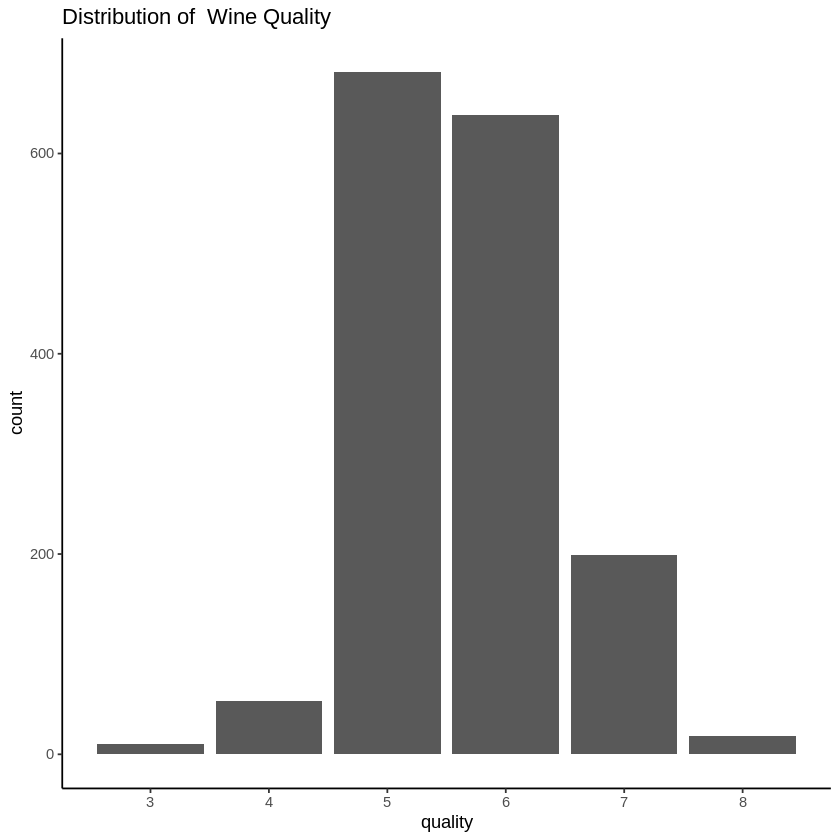

In [ ]:
ggplot(data,aes(x=quality))+geom_bar(stat = "count",position = "dodge")+
  scale_x_continuous(breaks = seq(3,8,1))+
  ggtitle("Distribution of  Wine Quality")+
  theme_classic()

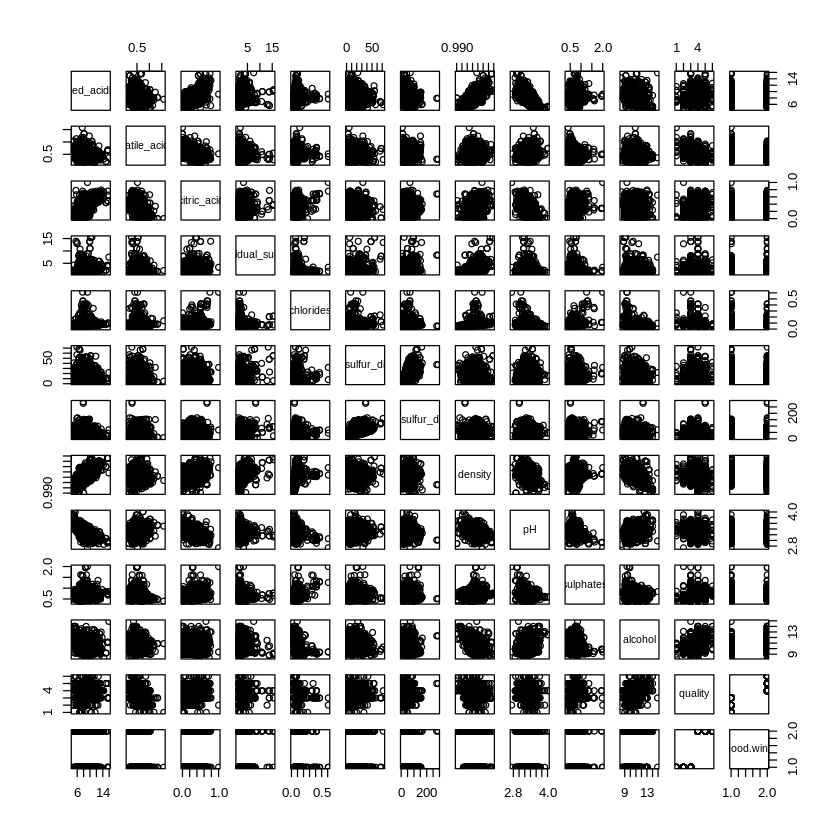

In [ ]:
plot(data)

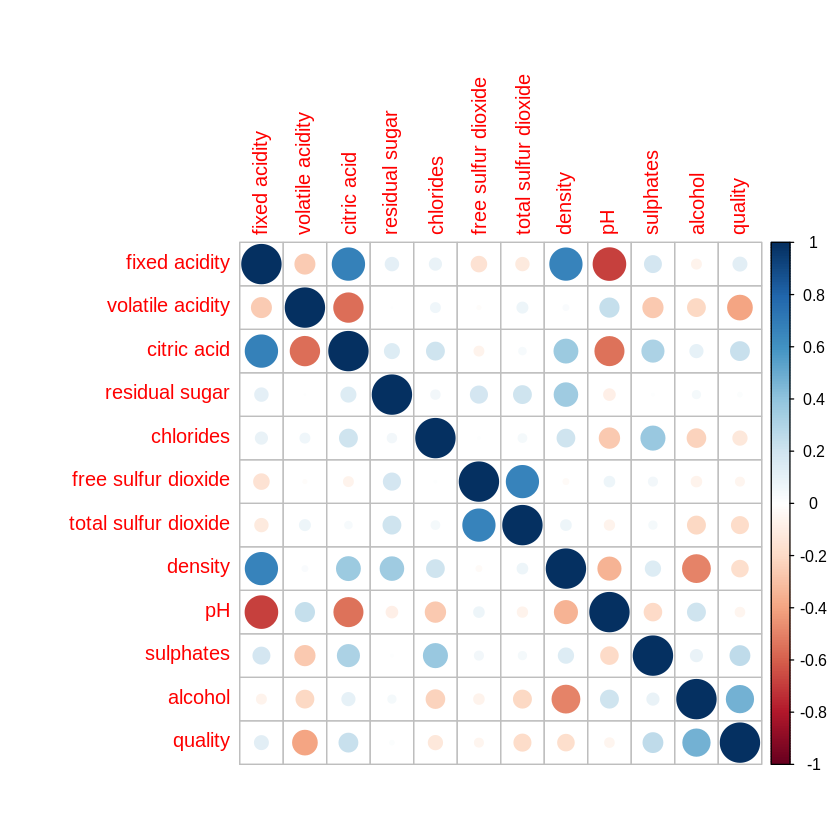

In [ ]:
corrplot(cor(data))

By having a look at the heat map, we understand that the variables: residual_sugar, free_sulfur_dioxide, total_sulfur_dioxide, and chlorides do not have a strong relationship with the quality variable
Let's now check, with the help og GGally, which of the remaining variables have a more significant difference across different quality

List of 1
 $ legend.position: chr "bottom"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

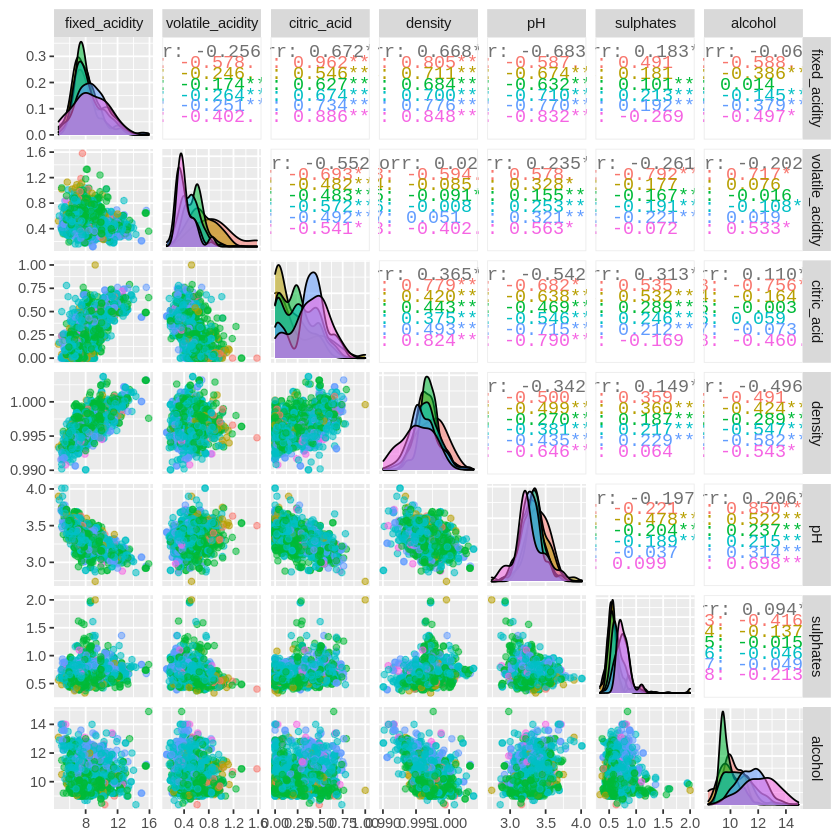

In [ ]:
data %>%
  mutate(quality = as.factor(quality)) %>%
  select(-c(residual_sugar, free_sulfur_dioxide, total_sulfur_dioxide, chlorides)) %>%
  ggpairs(aes(colour = quality, alpha=0.4),
  columns=1:7,
  lower=list(continuous="points"))
 theme(legend.position = "bottom")

By analyzing the graph above, we observe some general tendencies in the data:
 -The data is mostly normally distributed
 -fixed_acidity, sulphates and alcohol have the more significant impact in different qualities

 We can now proceed to the next step, Machine Learning

# **Unsupervised Machine Learning**

We're gonna use the most popular dimensionality reduction technique, PCA
We need to intall FactoMineR package to execute PCA, and factoextra for extracting and vizualizing the results
We also need to scale the data by setting scale.unit = TRUE

In [ ]:
# # Install packages if necessary
install.packages('FactoMineR')
install.packages('factoextra')

# Load packages
library(FactoMineR)
library(factoextra)

In [ ]:
data_pca <- data %>%
  select_if(is_numeric) %>%
  PCA(scale.unit = TRUE, graph = FALSE)

Warning message:
“Deprecated”
Warning message:
“Deprecated”
Warning message:
“Deprecated”
Warning message:
“Deprecated”
Warning message:
“Deprecated”
Warning message:
“Deprecated”
Warning message:
“Deprecated”
Warning message:
“Deprecated”
Warning message:
“Deprecated”
Warning message:
“Deprecated”
Warning message:
“Deprecated”
Warning message:
“Deprecated”


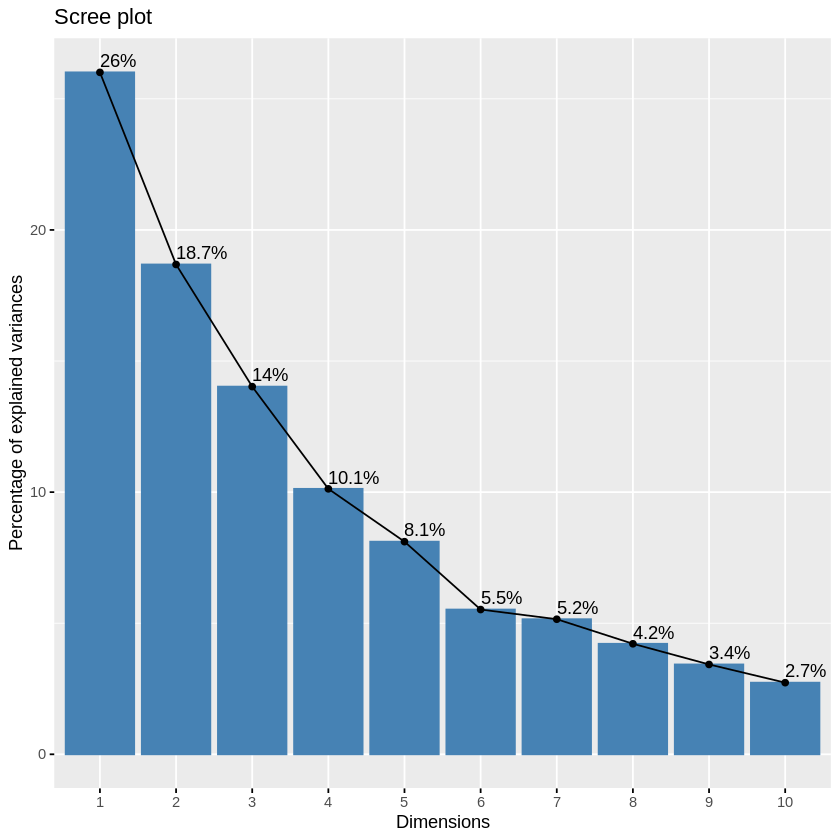

In [ ]:
data_pca %>%
  fviz_screeplot(addlabels = TRUE,
                 ncp = 10,
                 ggtheme = theme_gray())

In [ ]:
data_pca$eig %>% as_tibble()

eigenvalue,percentage of variance,cumulative percentage of variance
<dbl>,<dbl>,<dbl>
3.12116770,26.0097308,26.00973
2.24188204,18.6823504,44.69208
1.68291969,14.0243308,58.71641
1.21502087,10.1251739,68.84159
0.97326362,8.1105302,76.95212
0.66259224,5.5216020,82.47372
0.61831780,5.1526483,87.62637
0.50587256,4.2156046,91.84197
0.41130754,3.4275628,95.26953


By analyzing the screeplot, we see that the four first components already capture a main share of the variance
By analyzing the corresponding eigenvalues, we should only include components with an eigenvalue > 1, so we should include the first four components

In [ ]:
data_pca %>% get_pca_var()

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

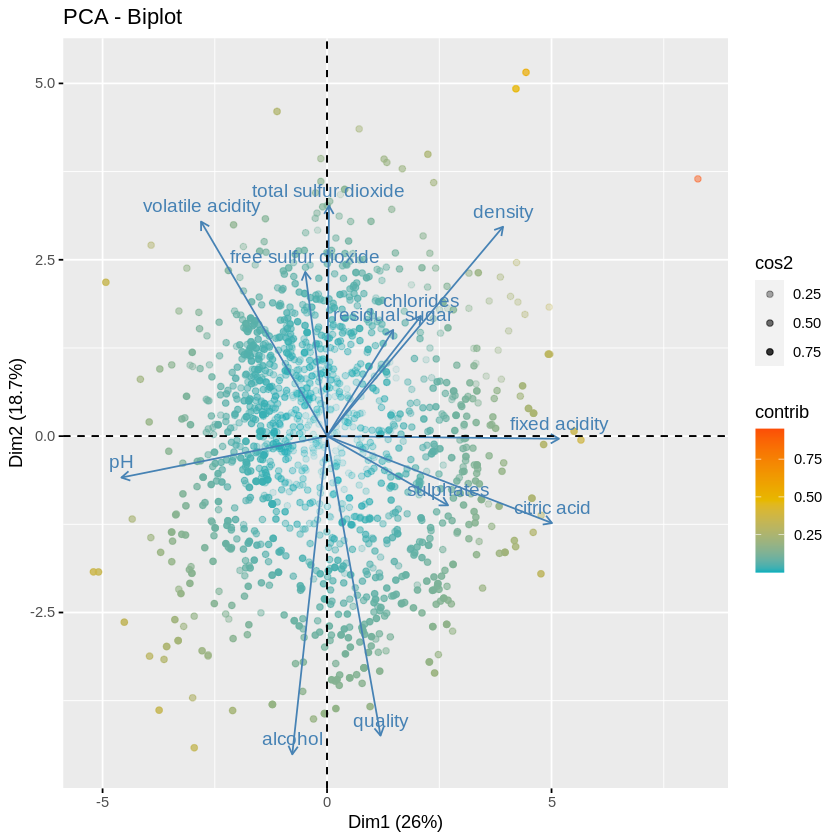

In [ ]:
data_pca %>%
  fviz_pca_biplot(alpha.ind = "cos2",
                  col.ind = "contrib",
                  gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
                  geom = "point",
                  ggtheme = theme_gray())

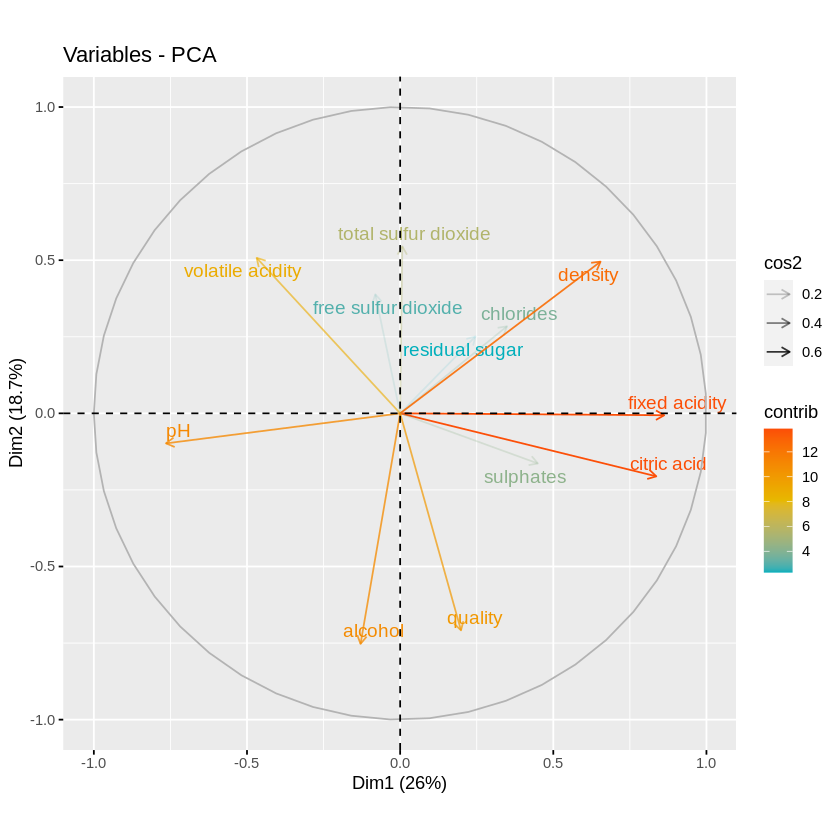

In [ ]:
data_pca %>%
  fviz_pca_var(alpha.var = "cos2",
               col.var = "contrib",
               gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
               repel = TRUE,
               ggtheme = theme_gray())

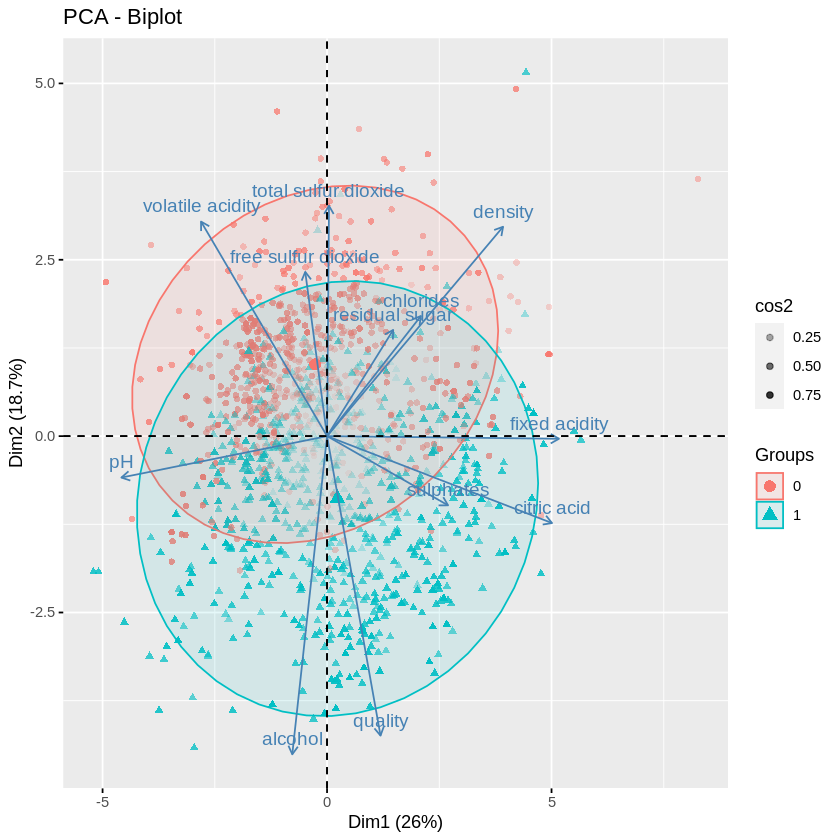

In [ ]:
data_pca %>%
  fviz_pca_biplot(alpha.ind = "cos2",
                  geom = "point",
                  habillage = data %>% pull(good.wine) %>% factor(),
                  addEllipses = TRUE,
                  ggtheme = theme_gray())

After doing a dimensionality reduction, we'll proceed to clusting
We'll performe a K-means clustering, where we have to choose upfront our k

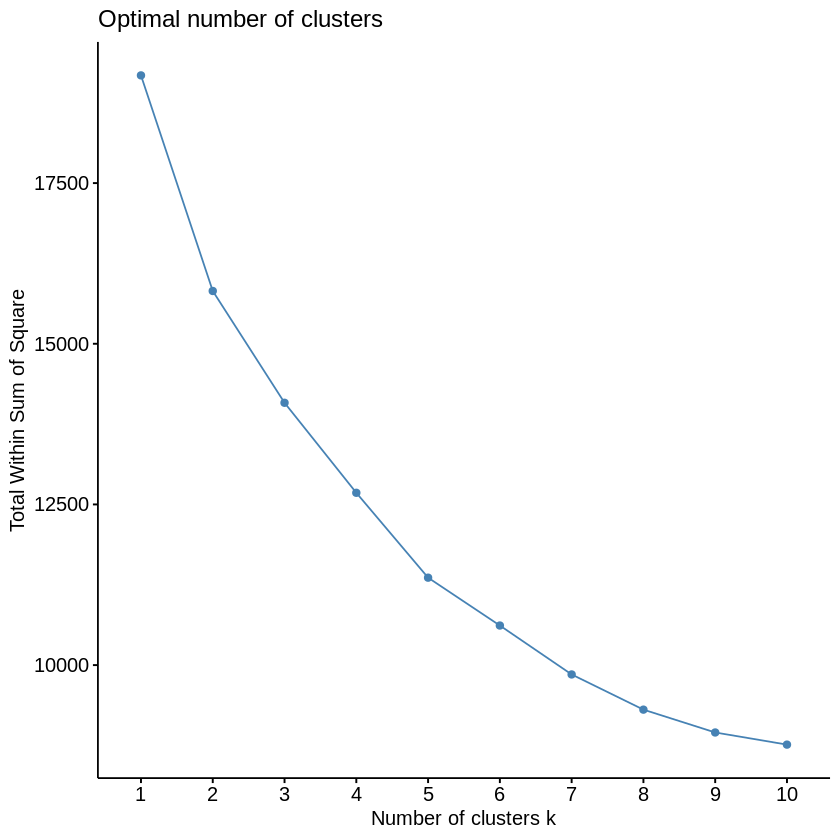

In [ ]:
data %>%
  select_if(is.numeric) %>%
  scale() %>%
  fviz_nbclust(kmeans, method = "wss")

We decide to choose 2 different cluster as we want to identify if the wine either has a good quality or a bad quality

In [ ]:
res_km <- data %>%
  select(1:11) %>%
  scale() %>%
  kmeans(centers = 2, nstart = 20)

In [ ]:
res_km

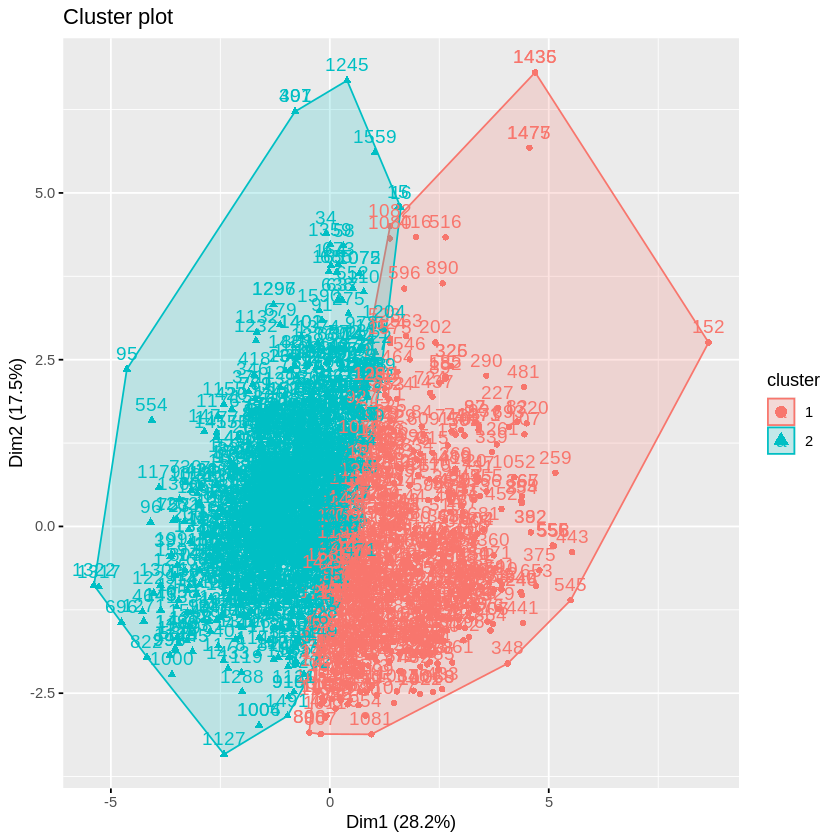

In [ ]:
res_km %>%
  fviz_cluster(data = data %>% select(1:11) ,
               ggtheme = theme_gray())

In [ ]:
data %>%
  bind_cols(cluster = res_km$cluster) %>%
  select_if(is_numeric) %>%
  group_by(cluster) %>%
  mutate(n = n()) %>%
  summarise_all(funs(mean))

Warning message:
“Deprecated”
Warning message:
“Deprecated”
Warning message:
“Deprecated”
Warning message:
“Deprecated”
Warning message:
“Deprecated”
Warning message:
“Deprecated”
Warning message:
“Deprecated”
Warning message:
“Deprecated”
Warning message:
“Deprecated”
Warning message:
“Deprecated”
Warning message:
“Deprecated”
Warning message:
“Deprecated”
Warning message:
“Deprecated”
Warning message:
“Deprecated”
Warning message:
“`funs()` is deprecated as of dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”
Warning message in mean.default(quality):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(quality):
“argumen

cluster,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,good.wine,n
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9.922712,0.4139068,0.4628814,2.765763,0.09990000,13.41017,39.38814,0.9976893,3.201847,0.7482373,10.60740,NA,0.6644068,590
2,7.382260,0.5944301,0.1587611,2.406095,0.08019623,17.31615,50.60753,0.9961955,3.375005,0.6054708,10.31515,NA,0.4588702,1009


In [ ]:
table(data$good.wine, res_km$cluster)

   
      1   2
  0 198 546
  1 392 463

# **Supervides Machine Learning**

In [ ]:
install.packages('mlbench')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



We noticed from the Data Exploration and Vizualization that citric_acid, residual_sugar, density and pH variables are not statistically significant and therefore we are going to exclude them from the model

In [ ]:
data %<>%
rename(y = quality) %>%
select(y, fixed_acidity, volatile_acidity, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, sulphates, alcohol )

In [ ]:
install.packages("tidymodels")
library(tidymodels)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘listenv’, ‘prodlim’, ‘future’, ‘warp’, ‘lhs’, ‘iterators’, ‘DiceDesign’, ‘globals’, ‘gower’, ‘ipred’, ‘timeDate’, ‘furrr’, ‘slider’, ‘GPfit’, ‘foreach’, ‘hardhat’, ‘pROC’, ‘dials’, ‘infer’, ‘modeldata’, ‘parsnip’, ‘recipes’, ‘rsample’, ‘tune’, ‘workflows’, ‘yardstick’


── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.8 
✔ infer     0.5.3      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3      ✔ yardstick 0.0.7 

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard()     masks purrr::discard()
✖ magrittr::extract()   masks tidyr::extract()
✖ dplyr::filter()       masks stats::filter()
✖ recipes::fixed()      masks stringr::fixed()
✖ dplyr::lag()      

We first need to split our data in training and test sample. We are going to do so by using the function initial_split

In [ ]:
data_split <- initial_split(data, prop = 0.8, strata = y)
  data_train <- data_split %>% training()
  data_test <- data_split %>% testing ()

In [ ]:
data_recipe <- data_train %>%
  recipe(y ~.) %>%
  step_center(all_numeric(), -all_outcomes()) %>% 
  step_scale(all_numeric(), -all_outcomes()) %>% 
  step_nzv(all_predictors())  %>% 
  step_knnimpute(all_predictors()) %>% 
  prep()

In [ ]:
data_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          7

Training data contained 1281 data points and no missing data.

Operations:

Centering for fixed_acidity, volatile_acidity, ... [trained]
Scaling for fixed_acidity, volatile_acidity, ... [trained]
Sparse, unbalanced variable filter removed no terms [trained]
K-nearest neighbor imputation for volatile_acidity, ... [trained]

Define the Models
We need to first define the models to run

In [ ]:
model_XX <- model_family(mode = 'regression/classification',
                         parameter_1 = 123,
                         parameter_2 = tune()) %>%
  set_engine('packagename')

In [ ]:
## Linear Model
model_lm <- linear_reg(mode = "regression") %>%
  set_engine("lm")

In [ ]:
## Elastic Net
model_el <- linear_reg(mode = "regression",
                        penalty = tune(),
                        mixture = tune()) %>%
            set_engine("glmnet")

In [ ]:
## Random Forest
model_rf <- rand_forest(mode = "regression",
                        trees = 25,
                        mtry = tune(),
                        min_n = tune()
                        ) %>%
          set_engine("ranger", importance = "impurity")

### Define Workflow
We now define the workflows by putting the preprocessing recipe together with the corresponding models

In [ ]:
workflow_general <- workflow() %>%
  add_recipe(data_recipe)

workflow_lm <- workflow_general %>%
  add_model(model_lm)

workflow_el <- workflow_general %>%
  add_model(model_el)

workflow_rf <- workflow_general %>%
  add_model(model_rf)

### Hyperparameter Tuning

In [ ]:
data_resample <- bootstraps(data_train,
                            strata = y,
                            times = 5)

In [ ]:
data_resample %>% glimpse()

Rows: 5
Columns: 2
$ splits <list> [<rsplit[1281 x 475 x 1281 x 8]>, <rsplit[1281 x 467 x 1281 x…
$ id     <chr> "Bootstrap1", "Bootstrap2", "Bootstrap3", "Bootstrap4", "Boots…


In [ ]:
install.packages("glmnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



 While running the tune_el code I was getting this error message: “All models failed in tune_grid(). See the `.notes` column.”
 I tried to find a solution on the web, and I came with the one below, but it is still giving an error message so I don't know what might be the problem

In [ ]:
tune_el <-
  tune_grid(
    workflow_el,
    resamples = data_resample,
    grid = 10
  )

In [ ]:
tune_el %>% autoplot()

ERROR: ignored

In [ ]:
install.packages("ranger")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
tune_rf <-
  tune_grid(
    workflow_rf,
    resamples = data_resample,
    grid = 10
  )

In [ ]:
tune_rf %>% autoplot()

ERROR: ignored